In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def hourly_data(df):
    length = int(df.shape[1]/4)
    for index in np.arange(length):
        # extract column name whenever string matches the beginning of the hour
        hour = df.iloc[:,(index*4)].name[0:4]+"-"+df.iloc[:,(index*4+3)].name[5:]
        # assign hourly data by summing 15min data
        df[hour] = df.iloc[:,(index*4):(index*4+4)].sum(axis=1)
    # drop 15min data
    return df.drop(df.iloc[:,0:length*4],axis=1)

## Passenger Count

In [2]:
# data taken on november 10
passenger_count = pd.read_csv('passenger-counts-entries-10-weekday-sample.csv')
passenger_count = passenger_count[0:268].drop(['Date','Note','Unnamed: 100'],1)
passenger_count = pd.concat([passenger_count.iloc[:,0:2], hourly_data(passenger_count.iloc[:,2:98]), passenger_count.iloc[:,98:]], axis=1)

passenger_count.columns

Index(['nlc', 'Station', '0200-0300', '0300-0400', '0400-0500', '0500-0600',
       '0600-0700', '0700-0800', '0800-0900', '0900-1000', '1000-1100',
       '1100-1200', '1200-1300', '1300-1400', '1400-1500', '1500-1600',
       '1600-1700', '1700-1800', '1800-1900', '1900-2000', '2000-2100',
       '2100-2200', '2200-2300', '2300-2400', '0000-0100', '0100-0200',
       'Total', 'Early', 'A.M. Peak', 'Inter peak', 'P.M. Peak', 'Evening'],
      dtype='object')

C:\Users\jwcn9\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


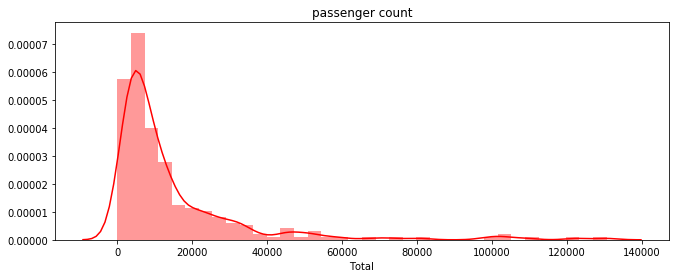

In [3]:
fig,ax = plt.subplots(figsize=(11,4))

ax.set_title('passenger count')
sns.distplot(passenger_count['Total'], ax=ax, color='r')

C:\Users\jwcn9\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Passenger Counts in Underground')

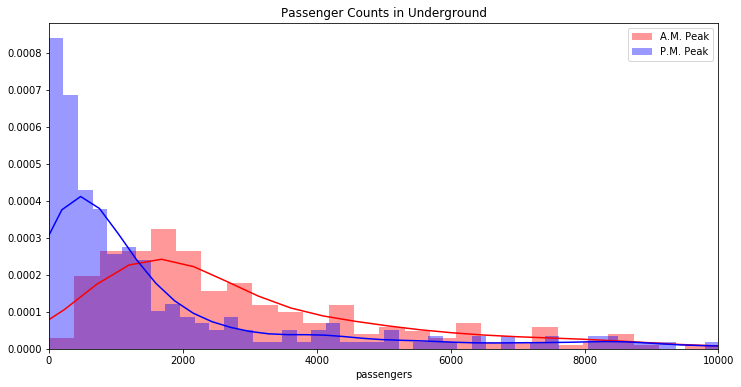

In [4]:
fig,ax = plt.subplots(figsize=(12,6))
ax.set_xlim([0,10000])
sns.distplot(passenger_count['A.M. Peak'], color='r', ax=ax, label='A.M. Peak', bins=150)
# sns.distplot(passenger_count['Inter peak'], color='y', ax=ax, label='Inter Peak', bins=150)
# sns.distplot(passenger_count['P.M. Peak'], color='b', ax=ax, label='P.M. Peak', bins=150)
sns.distplot(passenger_count['Evening'], color='b', ax=ax, label='P.M. Peak', bins=150)
ax.set_xlabel('passengers')
ax.legend()
ax.set_title("Passenger Counts in Underground")

Text(0.5, 1.0, 'Passenger Count Correlation')

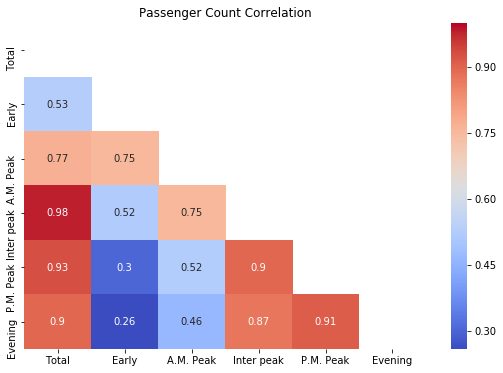

In [19]:
passenger_count_mask = passenger_count[['Total', 'Early', 'A.M. Peak', 'Inter peak', 'P.M. Peak', 'Evening']]
mask = np.zeros_like(passenger_count_mask.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(9,6))
sns.heatmap(passenger_count_mask.corr(), annot=True, cmap='coolwarm', mask=mask)
plt.title('Passenger Count Correlation')
# total passenger count follows "inter peak" the most and "early times" the least
# evening and early times are highly uncorrelated

## Passenger Link Flows

In [6]:
passenger_link_flows = pd.read_csv('StationPassengerLinkFlows.csv')
passenger_link_flows.drop(['NAPTAN','NLC'],1,inplace=True)
passenger_link_flows = pd.concat([passenger_link_flows.iloc[:,0:3], hourly_data(passenger_link_flows.iloc[:,3:])], axis=1)
passenger_link_flows['Total'] = passenger_link_flows.iloc[:,3:].sum(axis=1)

passenger_link_flows.columns

Index(['Start_Node', 'End_Node', 'Station', '0500-0600', '0600-0700',
       '0700-0800', '0800-0900', '0900-1000', '1000-1100', '1100-1200',
       '1200-1300', '1300-1400', '1400-1500', '1500-1600', '1600-1700',
       '1700-1800', '1800-1900', '1900-2000', '2000-2100', '2100-2200',
       '2200-2300', '2300-0000', '0000-0100', '0100-0200', 'Total'],
      dtype='object')

C:\Users\jwcn9\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


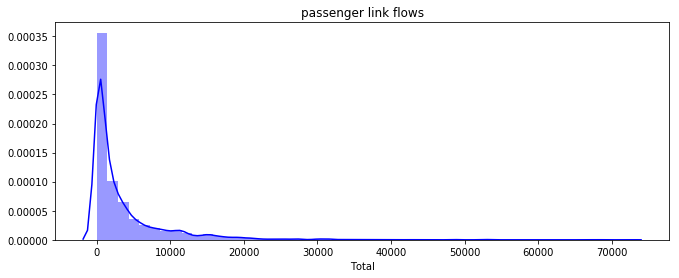

In [7]:
fig,ax = plt.subplots(figsize=(11,4))

ax.set_title('passenger link flows')
sns.distplot(passenger_link_flows['Total'], ax=ax, color='b')

Text(0.5, 1.0, 'Passenger Link Flows Correlation')

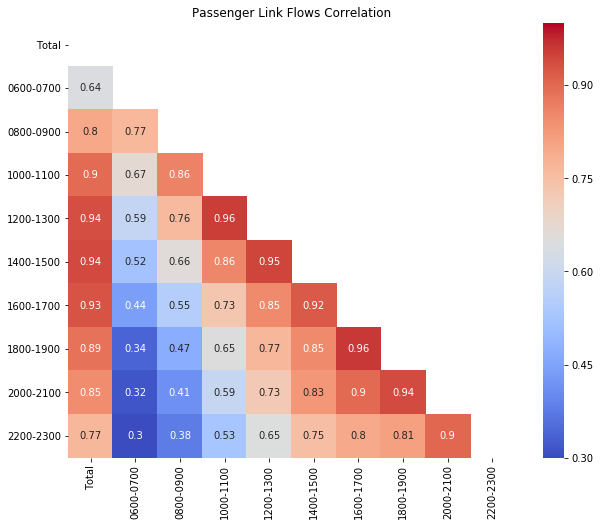

In [18]:
passenger_mask = passenger_link_flows[['Total', '0600-0700', '0800-0900', '1000-1100',
                                  '1200-1300', '1400-1500', '1600-1700',
                                  '1800-1900', '2000-2100', '2200-2300']]
mask = np.zeros_like(passenger_mask.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,8))
sns.heatmap(passenger_mask.corr(), annot=True, cmap='coolwarm', mask=mask)
plt.title('Passenger Link Flows Correlation')